In [ ]:
include("../src/CRNOscillation.jl")
include("../src/BioCosmos.jl")
using StatsPlots

[ Info: Precompiling SymPy [24249f21-da20-56a4-8eb1-6a02cf4ae2e6]
┌ Warning: Module Conda with build ID ffffffff-ffff-ffff-0004-7477a189f7ef is missing from the cache.
│ This may mean Conda [8f4d0f93-b110-5947-807f-2305c1781a2d] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1793
[ Info: Skipping precompilation since __precompile__(false). Importing SymPy [24249f21-da20-56a4-8eb1-6a02cf4ae2e6].
[ Info: Precompiling PyCall [438e738f-606a-5dbb-bf0a-cddfbfd45ab0]
┌ Warning: Module Conda with build ID ffffffff-ffff-ffff-0004-7477a189f7ef is missing from the cache.
│ This may mean Conda [8f4d0f93-b110-5947-807f-2305c1781a2d] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1793
[ Info: Skipping precompilation since __precompile__(false). Importing PyCall [438e738f-606a-5dbb-bf0a-cddfbfd45ab0].
[ Info: Precompiling DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
┌ Warning: AES-NI instruction se

In [113]:
ΔG_AF = 1; ΔG_BF = 1; ΔG_A = 6; ΔG_B = 6; ΔG_FF = 1
β = 1.; λ0 = -.5; Δλ = .5

N0 = [.1, 1., 0., 0., 0., .1, 0., 0., 0.]
init_c = Dict(zip(species(competitive_A4B1_open), N0))
init_nc = Dict(zip(species(autocatalysis_open), N0[1:5]))

feed_rates_c = [8., 1., 1., 1., 1., 1.]
feed_rates_nc = [4., 1., 1., 1.]

4-element Vector{Float64}:
 4.0
 1.0
 1.0
 1.0

In [110]:
p = affinity_lambda(autocatalysis_open, -1.5, 1.5)
savefig(p, "~/workspace/OscillationCatalysis/plots/affinity_vs_lambda_4.png")

"/Users/vydu/workspace/OscillationCatalysis/plots/affinity_vs_lambda_4.png"

In [111]:
p = affinity_lambda(oneStep_open, -1.5, 2.5)
savefig(p, "~/workspace/OscillationCatalysis/plots/affinity_vs_lambda_1.png")

"/Users/vydu/workspace/OscillationCatalysis/plots/affinity_vs_lambda_1.png"

In [112]:
p = lr_lambda_comp(competitive_A4B1_open, -2.5, 2.5)
savefig(p, "~/workspace/OscillationCatalysis/plots/lr_vs_lambda_A4B1.png")

"/Users/vydu/workspace/OscillationCatalysis/plots/lr_vs_lambda_A4B1.png"

In [69]:
rn = oneStep_open
landscape, k = setRateConstants(rn, ΔG_AF, ΔG_FF, ΔG_A, β, feed_rates_nc)
params, sols = volumeOscillation(rn, λ0, Δλ, init_nc, k)
sols[1].u

5-element Vector{Float64}:
 1.4017921763433194
 2.3927984452005355
 2.2071310194131657
 2.1264275231248244
 2.0457242867901284

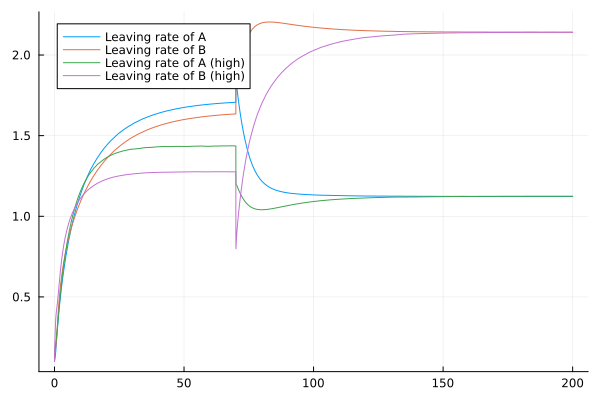

In [114]:
# Open competitive network 
sol_l, sol_h, p = competition(competitive_A4B1_open, "", tspan=(0., 200.), switch = 70.)
p
#savefig(p, "~/workspace/OscillationCatalysis/plots/lr_vs_time_A4B1.png")

In [96]:
affinity_numSteps_nc()
savefig(p, "~/workspace/OscillationCatalysis/plots/affinity_vs_numSteps.png")

low: 3.5197749371243283 high: -1.9862319031371616 avg: 2.275079020540028
low: 3.60120790248177 high: -1.985956440764884 avg: 2.990934071702018
low: 3.6449152637477926 high: -1.9854893391567625 avg: 3.4180597597295748
low: 3.6325374658653136 high: -1.9802722954498808 avg: 3.7629484846320764


"/Users/vydu/workspace/OscillationCatalysis/plots/affinity_vs_numSteps.png"

In [62]:
lrs = [sols[i].u[1] for i in 1:3] 

3-element Vector{Float64}:
 1.4017921763433194
 0.8776575485046233
 1.3712975330421562

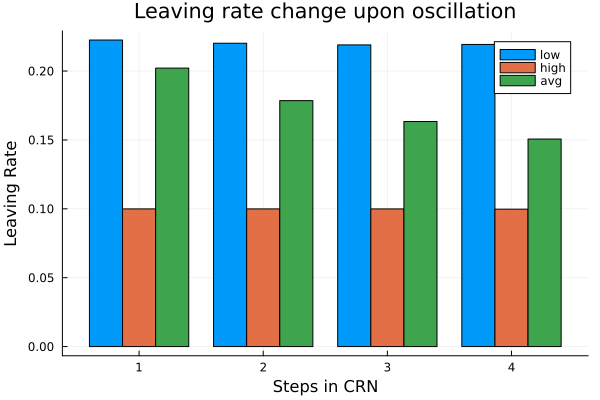

In [99]:
lr_numSteps()

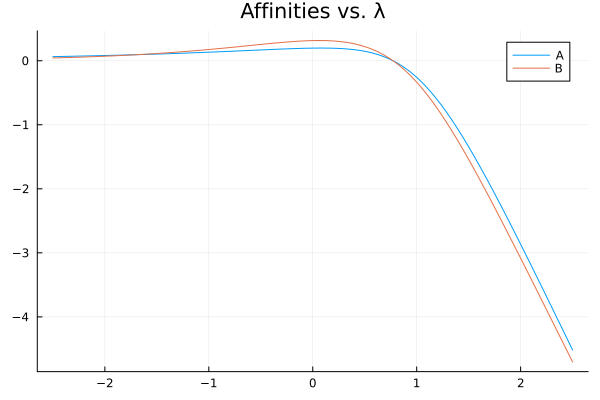

In [85]:
affinity_lambda_comp(competitive_A4B1_open, -2.5, 2.5)
savefig(p, "~/workspace/OscillationCatalysis/plots/affinity_vs_lambda_4.png")

In [75]:
# Goals: 
### Can oscillation produce more A's than 
### What is the relationship between affinity and LR?

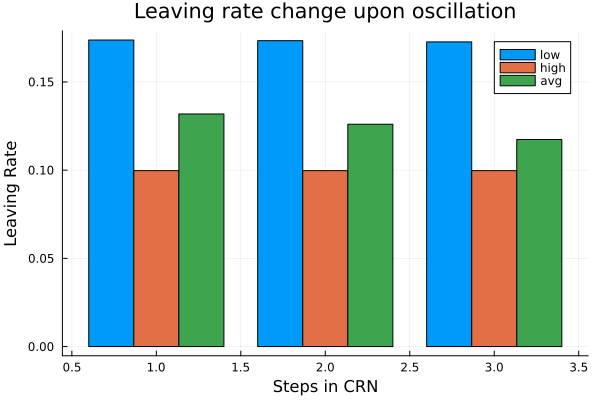

In [95]:
lr_numSteps_comp()

In [89]:
rn = competitive_A4B3_open
setRateConstants(rn, ΔG_AF, ΔG_FF, ΔG_A, β, feed_rates_c) 

LoadError: Length of feed rate vector is incorrect

In [116]:
p = lr_numSteps_comp()
savefig(p, "~/workspace/OscillationCatalysis/plots/lr_vs_numSteps_comp.png")

"/Users/vydu/workspace/OscillationCatalysis/plots/lr_vs_numSteps_comp.png"

In [103]:
    rns = [competitive_A4B3_open, competitive_A4B2_open, competitive_A4B1_open];
    rates = [setRateConstants(rn, ΔG_AF, ΔG_FF, ΔG_A, β, feed_rates_c, comp=true) for rn in rns]
    solutions = [volumeOscillation(rn, λ0, Δλ, init_c, k) for (rn, (ls, k)) in zip(rns, rates)]
    lrs_l = zeros(Float64, 0)
    lrs_h = zeros(Float64, 0)
    lrs_a = zeros(Float64, 0)
    
    for (params, sols) in solutions
        lrs_A = [sols[i].u[1] for i in 1:3]
        lrs_B = [sols[i].u[1] for i in 1:3]
        lrs = lrs_A .- lrs_B
        push!(lrs_l, lrs[1]); push!(lrs_h, lrs[2]); push!(lrs_a, lrs[3])
    end
lrs_l

3-element Vector{Float64}:
 0.0
 0.0
 0.0

In [ ]:
nc_fitness(closed_competition, 0.5, 3.)